import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data= pd .read_csv("dataset_olympics.csv")

In [1]:
data.head(5)

NameError: name 'data' is not defined

In [2]:
data.shape

NameError: name 'data' is not defined

### CHECKING FOR NULL VALUES

In [5]:
data.isnull().sum() 

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [6]:
#data.dropna(inplace=True)
data.dropna(subset=['Height', 'Weight'], inplace=True) 

In [7]:
data.isnull().sum()

ID            0
Name          0
Sex           0
Age         256
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     45416
dtype: int64

### CHECKING SHAPE OF THE DATA AFTER NULL VALUE REMOVAL

In [8]:
data.shape

(52522, 15)

### CHECKING DUPLICATES

In [9]:
data.duplicated().any()

False

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(52522, 15)

In [12]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

### DISTRIBUTION OF HEIGHT AND WEIGHT COLUMN

C:\Users\BHARATH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


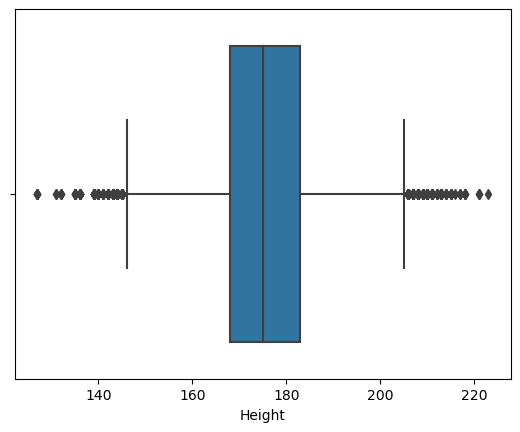

In [13]:
sns.boxplot(data['Height'])
plt.show()

C:\Users\BHARATH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


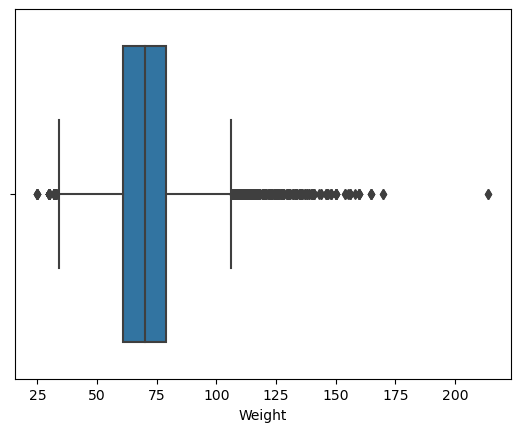

In [14]:
sns.boxplot(data['Weight'])
plt.show()

#### REMOVING OUTLIER OF HEIGHT COLLUMN

In [15]:
Q1= np.percentile(data['Height'],25)
Q3= np.percentile(data['Height'],75)

IQR=  Q3- Q1

upper_bracket= Q3 + 1.5 * IQR
lower_bracket= Q1 - 1.5 * IQR



In [16]:
upper= np.where(data['Height'] > upper_bracket)
#print(upper)

In [17]:
lower= np.where(data['Height'] < lower_bracket)
#print(lower)

In [18]:
upper_indices = data.index[upper]
lower_indices = data.index[lower]

print("Indices to drop (upper):", upper_indices)
print("Indices to drop (lower):", lower_indices)

Indices to drop (upper): Int64Index([  443,   820,  1186,  1322,  1634,  1635,  4238,  4589,  6119,
             6120,
            ...
            65295, 65565, 65566, 66102, 66855, 67550, 67584, 67686, 68783,
            69185],
           dtype='int64', length=161)
Indices to drop (lower): Int64Index([ 1622,  1623,  3453,  3510,  3778,  7500,  7501,  7677,  7678,
             7679,
            ...
            69217, 69218, 69219, 69220, 69221, 69222, 69223, 69224, 69225,
            69226],
           dtype='int64', length=155)


In [19]:
data.drop(upper_indices, inplace=True)
data.drop(lower_indices, inplace=True)

In [20]:
data.shape  #1000 rows removed

(52206, 15)

C:\Users\BHARATH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


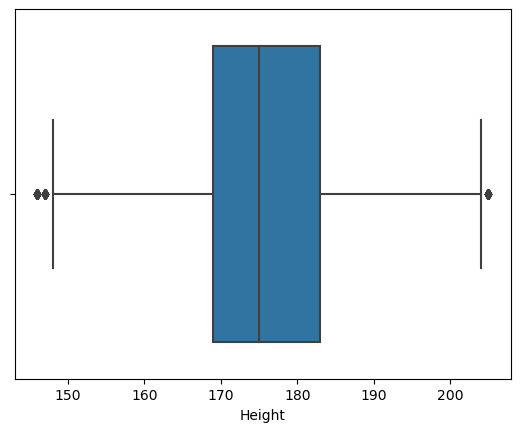

In [21]:
sns.boxplot(data['Height'])
plt.show()

###  REMOVING OUTLIER OF HEIGHT COLUMN

In [22]:
Q1= np.percentile(data['Weight'],25)
Q3= np.percentile(data['Weight'],75)

IQR=  Q3- Q1

upper_bracket= Q3 + 1.5 * IQR
lower_bracket= Q1 - 1.5 * IQR


In [23]:
upper= np.where(data['Weight'] > upper_bracket)
lower= np.where(data['Weight'] < lower_bracket)

In [24]:
upper_indices = data.index[upper]
lower_indices = data.index[lower]

print("Indices to drop (upper):", upper_indices)
print("Indices to drop (lower):", lower_indices)

Indices to drop (upper): Int64Index([   57,    80,   384,   507,   508,   588,   589,   614,   620,
              621,
            ...
            68154, 68356, 68814, 68815, 68871, 68943, 69148, 69511, 69580,
            69789],
           dtype='int64', length=735)
Indices to drop (lower): Int64Index([9824, 9825, 9826, 9827, 9828, 9829, 52617], dtype='int64')


In [25]:





data.drop(upper_indices, inplace=True)
data.drop(lower_indices, inplace=True)

In [26]:
data.shape

(51464, 15)

In [27]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [28]:
data.Games

0        1992 Summer
1        2012 Summer
4        1988 Winter
5        1988 Winter
6        1992 Winter
            ...     
69992    1964 Summer
69993    2016 Summer
69997    1976 Summer
69998    1980 Summer
69999    1998 Winter
Name: Games, Length: 51464, dtype: object

In [29]:
data['NOC'].unique()  #leave for now

array(['CHN', 'NED', 'USA', 'FIN', 'NOR', 'EST', 'FRA', 'ESP', 'EGY',
       'BUL', 'ITA', 'AZE', 'SUD', 'RUS', 'ARG', 'CUB', 'BLR', 'GRE',
       'CMR', 'MEX', 'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN',
       'PAK', 'IRQ', 'LIB', 'QAT', 'MAS', 'IRI', 'CAN', 'IRL', 'AUS',
       'RSA', 'MAR', 'ERI', 'TAN', 'JOR', 'UAR', 'TUN', 'LBA', 'BEL',
       'DJI', 'COM', 'KAZ', 'BRU', 'KSA', 'MDV', 'ETH', 'INA', 'PHI',
       'UAE', 'UZB', 'KGZ', 'TJK', 'JPN', 'BRA', 'FRG', 'GDR', 'GER',
       'ISR', 'SWE', 'ISV', 'TUR', 'SRI', 'ARM', 'CIV', 'KEN', 'BEN',
       'UKR', 'GHA', 'SOM', 'LAT', 'SYR', 'GBR', 'CHI', 'SUI', 'IND',
       'POL', 'CRC', 'PAN', 'GEO', 'SLO', 'CRO', 'GUY', 'POR', 'ANG',
       'VEN', 'COL', 'BAN', 'PLE', 'PER', 'ROU', 'URU', 'PUR', 'UGA',
       'NZL', 'HON', 'ECU', 'TKM', 'MRI', 'TCH', 'SEY', 'MTN', 'CZE',
       'NIG', 'SKN', 'TTO', 'DOM', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL',
       'PLW', 'LTU', 'MON', 'TOG', 'NAM', 'ISL', 'ASA', 'AUT', 'SAM',
       'RWA', 'DMA',

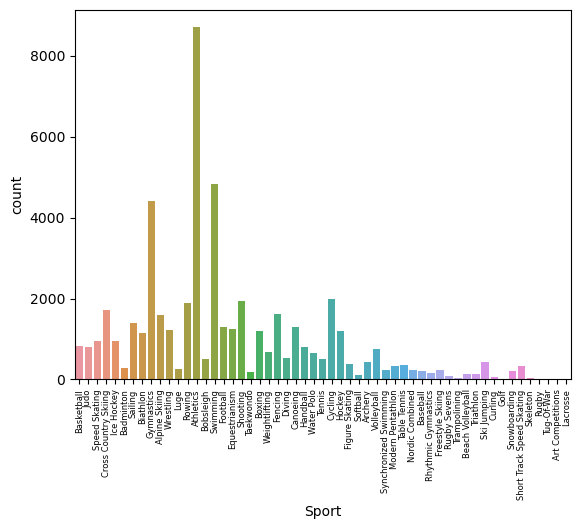

In [54]:
sns.countplot(x='Sport', data=data)
plt.xticks(rotation=90)
plt.xticks(fontsize=6) 
plt.show()

### SEX DISTRIBUTION

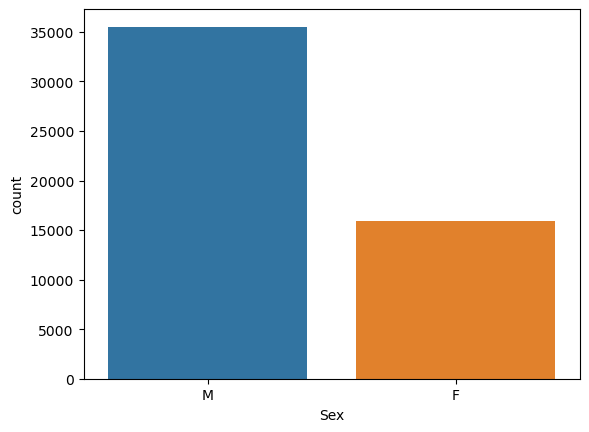

In [31]:
sns.countplot(x=data['Sex'])
plt.show()


### AGE DISTRIBUTION

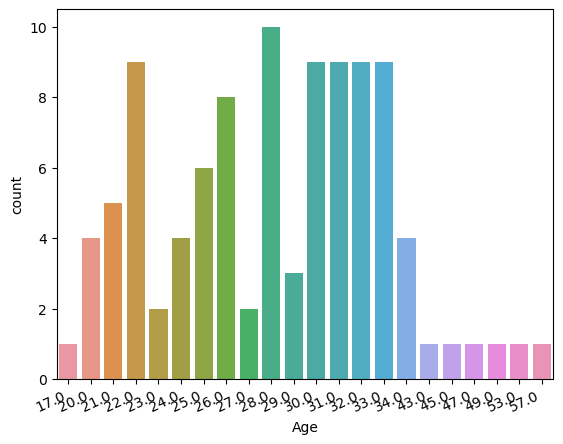

In [32]:
#plt.figure(figsize=(20,15))
sns.countplot(x=data['Age'][:100])
plt.xticks(rotation=25,ha='right')
plt.show()


### HEIGHT DISTRIBUTION

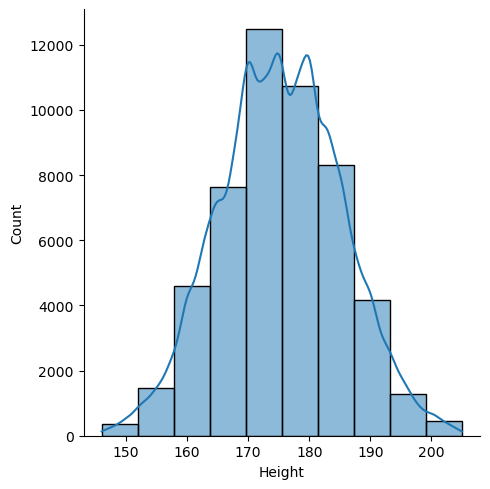

In [33]:
sns.displot(x=data['Height'],kde='True',bins=10)
plt.show()

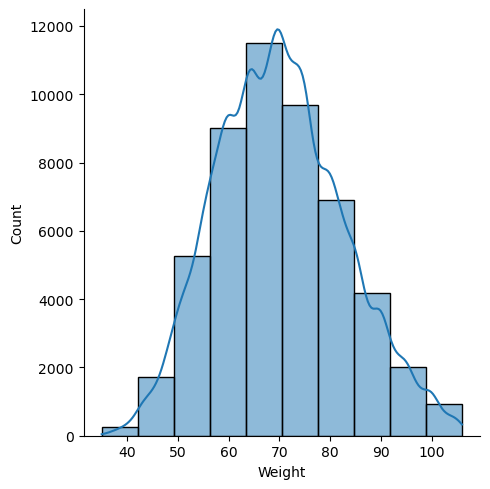

In [34]:
sns.displot(x=data['Weight'],kde='True',bins=10)
plt.show()

In [35]:
data.columns


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

### MEDAL DISTRIBUTION OVER THE YEAR

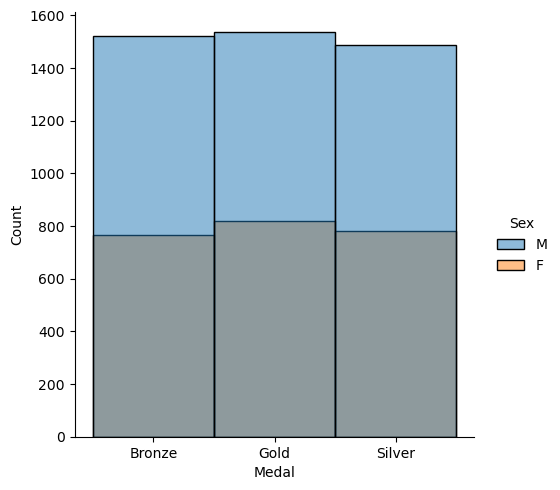

In [36]:

sns.displot(x=data['Medal'],data=data,hue='Sex',color='r')
#sns.countplot(data['Year'],hue='Medal') 
plt.show() 

### PERFORMANCE BY AGE 

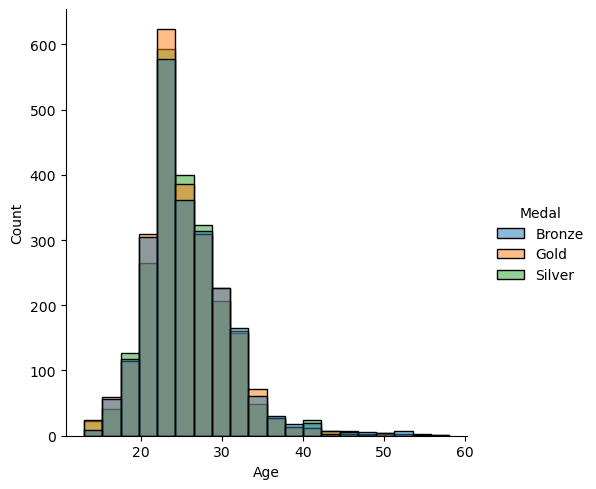

In [37]:
sns.displot(x=data['Age'],data=data,hue='Medal',color='r',bins=20)
#sns.barplot(x=data['Age'],y=data['Medal']) # not conclusive 
plt.show()

### MEDAL DISTRIBUTION OVER THE YEARS

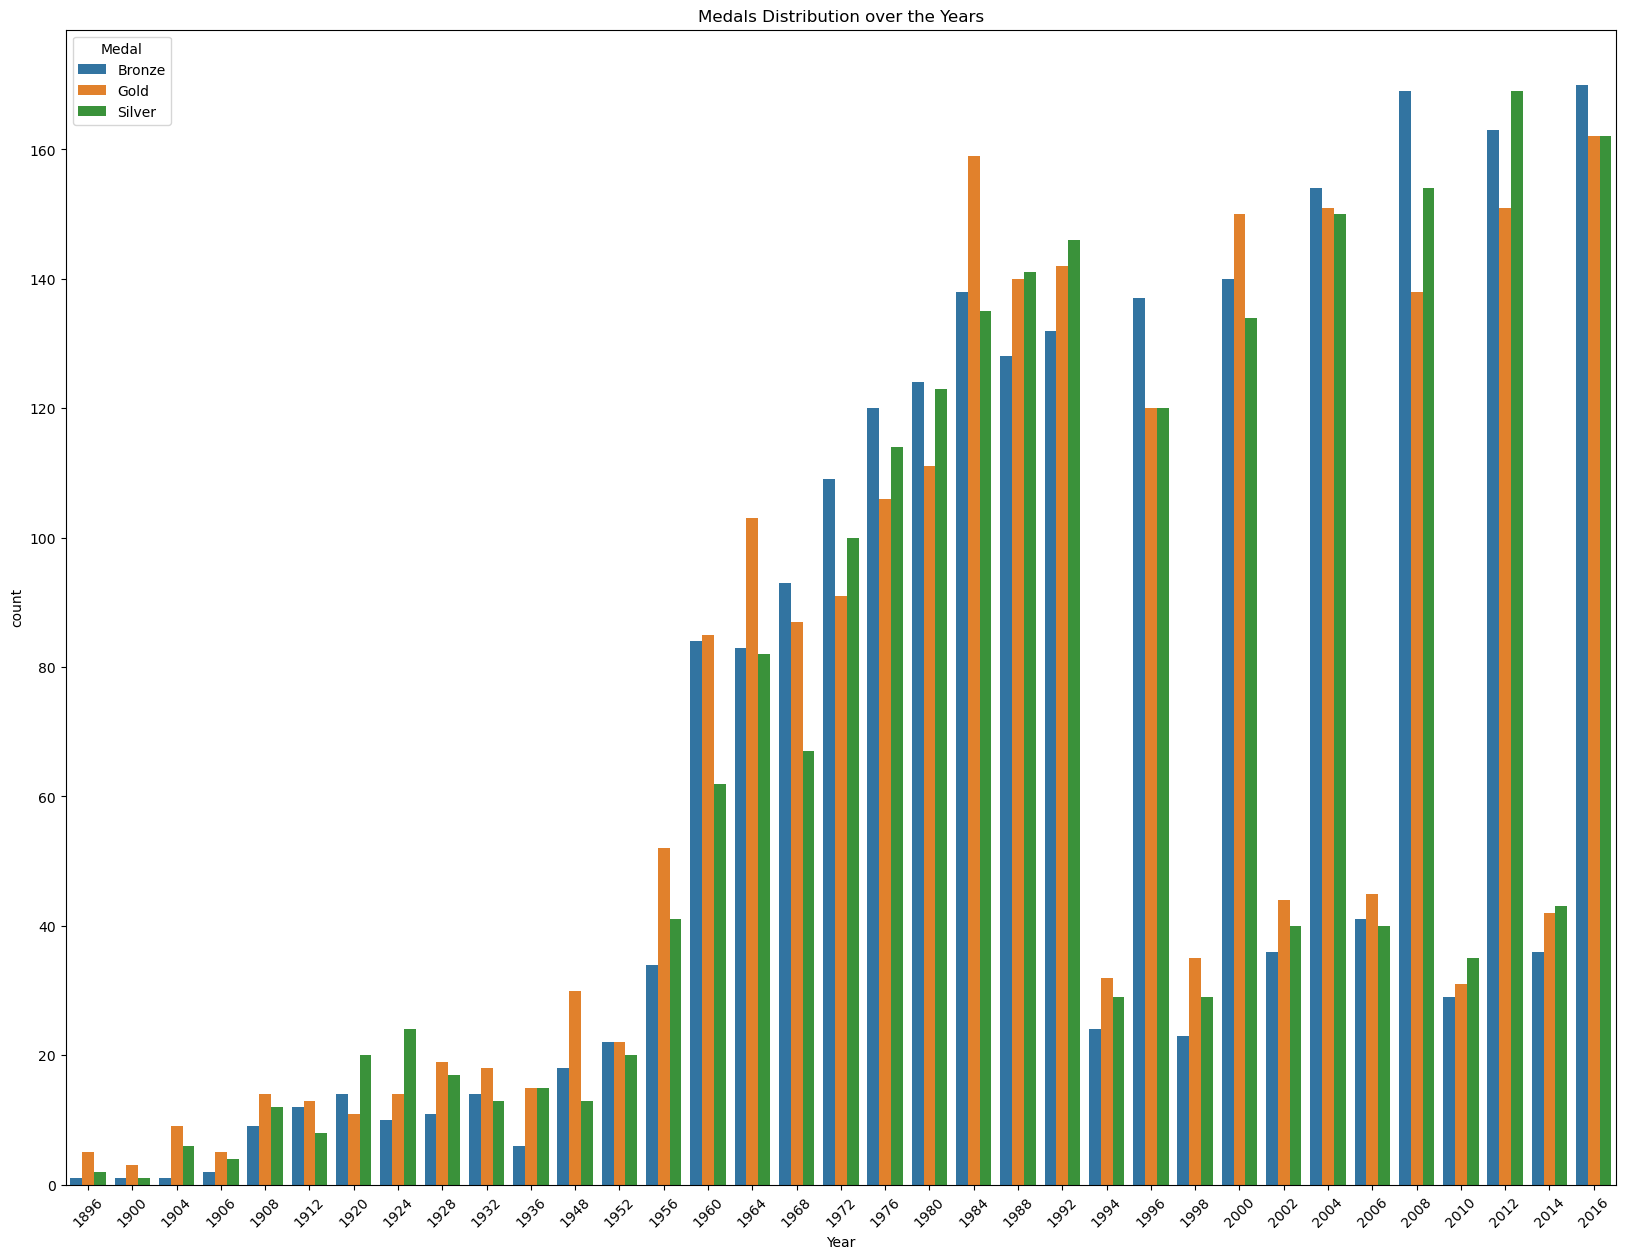

In [38]:
plt.figure(figsize=(20,15))
sns.countplot(data=data,x="Year",hue="Medal")
plt.title("Medals Distribution over the Years")
plt.xticks(rotation=45)
plt.show()

### MOST PLAYED SPORT

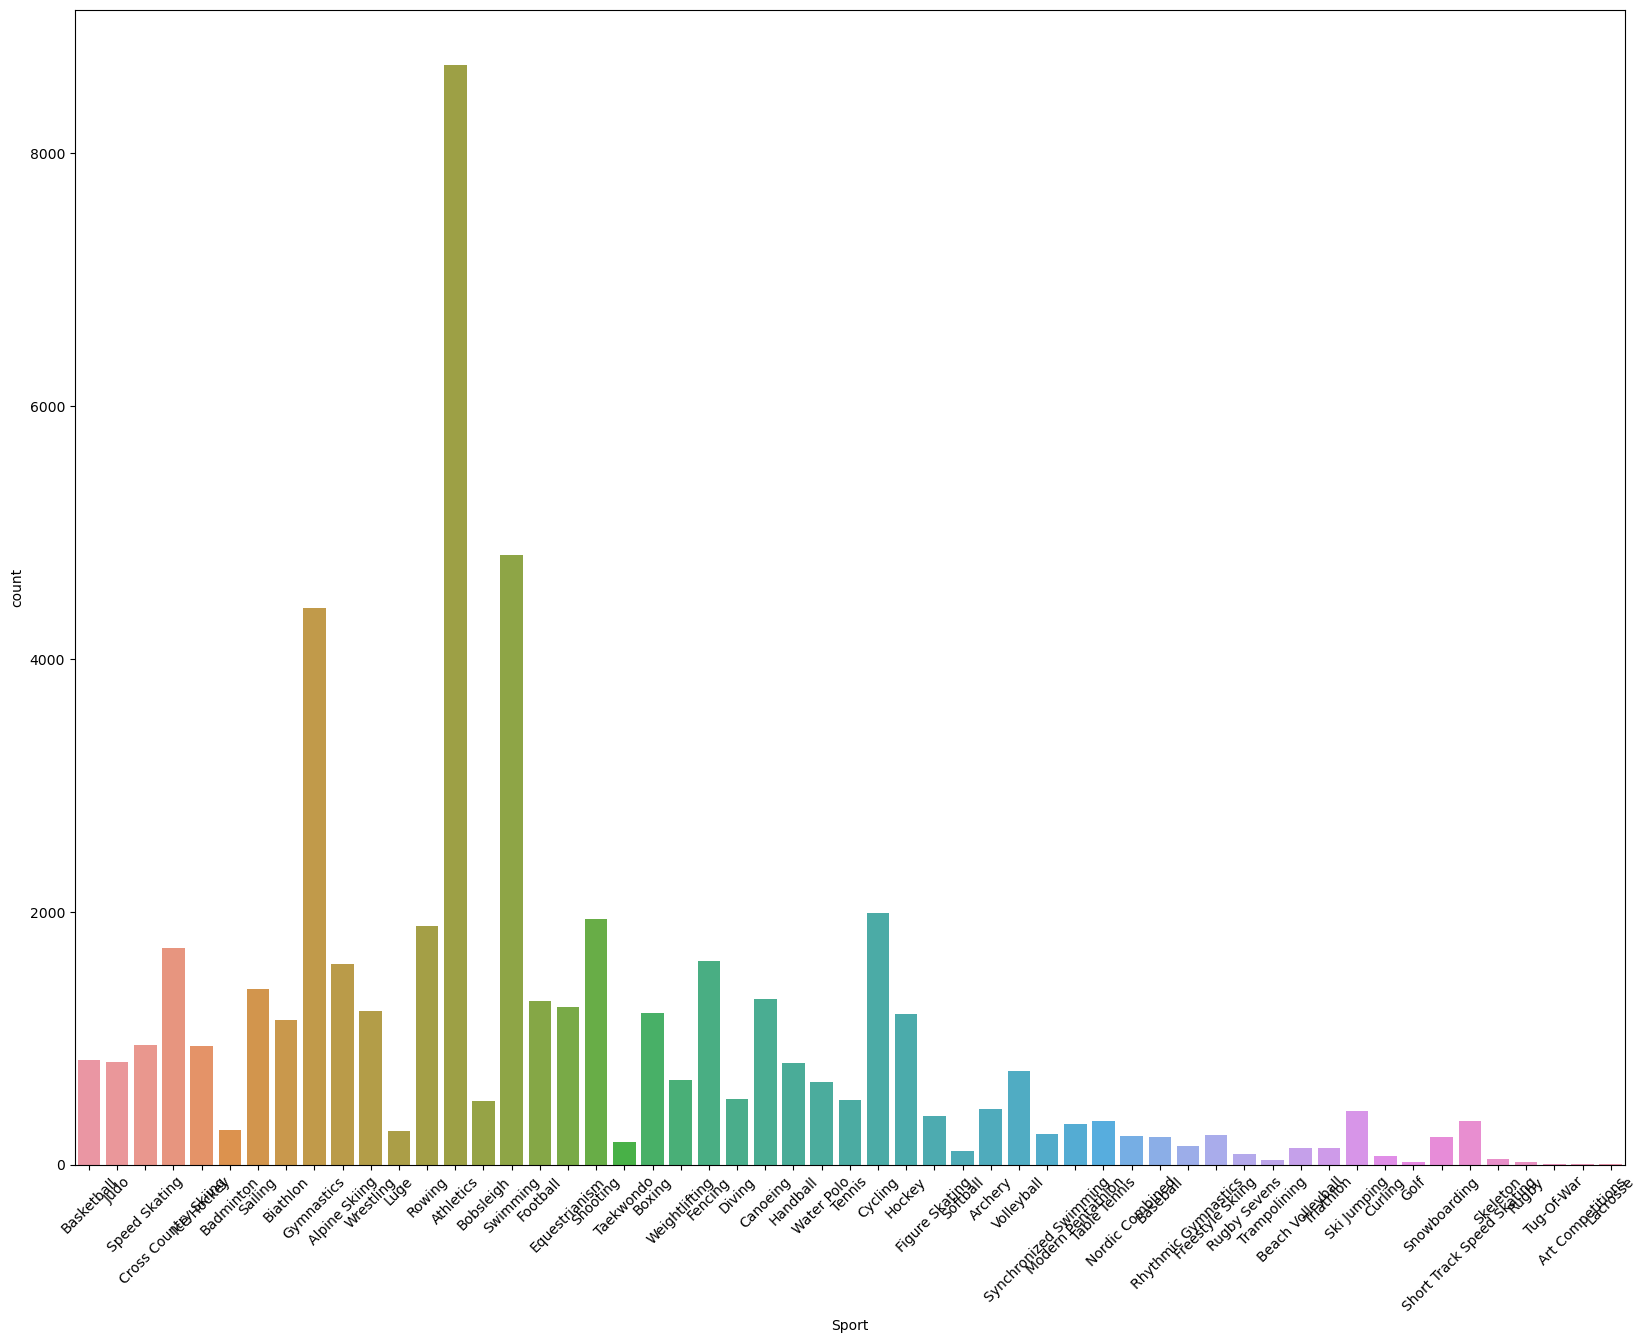

In [39]:
#sns.barplot(x=data['Year'],y=data['Sport'],data=data)
plt.figure(figsize=(20,15))
sns.countplot(x=data['Sport'])
plt.xticks(rotation=45)
plt.show()

### AVERAGE AGE BY COUNTRIES(TOP 20 COUNTRIES)

<AxesSubplot:xlabel='Team'>

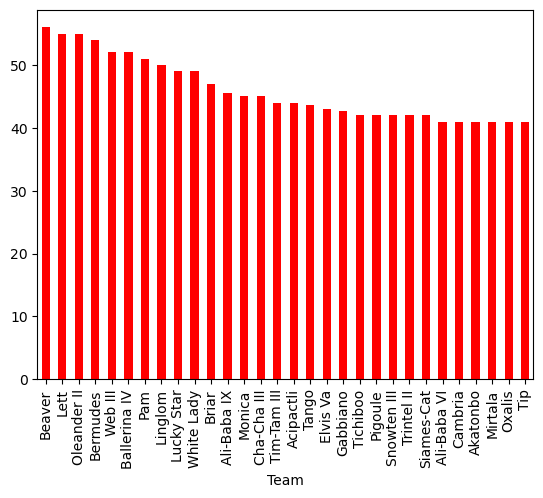

In [40]:
avg_age=data.groupby('Team')['Age'].mean().sort_values(ascending=False)
avg_age.iloc[0:30].plot(kind='bar',color='red')
#sns.displot(avg_age)
#plt.show()

In [41]:
sports_of_interest = ['Basketball', 'Speed Skating', 'Gymnastics', 'Football', 'Volleyball']

# Filter the dataset for the relevant sports and gold medalists
filtered_data = data[(data['Sport'].isin(sports_of_interest)) & (data['Medal'] == 'Gold')]

In [42]:
# Calculate the average height of gold medalists in each sport
avg_height_per_sport = filtered_data.groupby('Sport')['Height'].mean().reset_index()

# Calculate the count of gold medals in each sport
gold_medal_count = filtered_data['Sport'].value_counts().reset_index()
gold_medal_count.columns = ['Sport', 'Gold Medal Count']

# Merge the average height and gold medal count dataframes
merged_data = pd.merge(avg_height_per_sport, gold_medal_count, on='Sport')


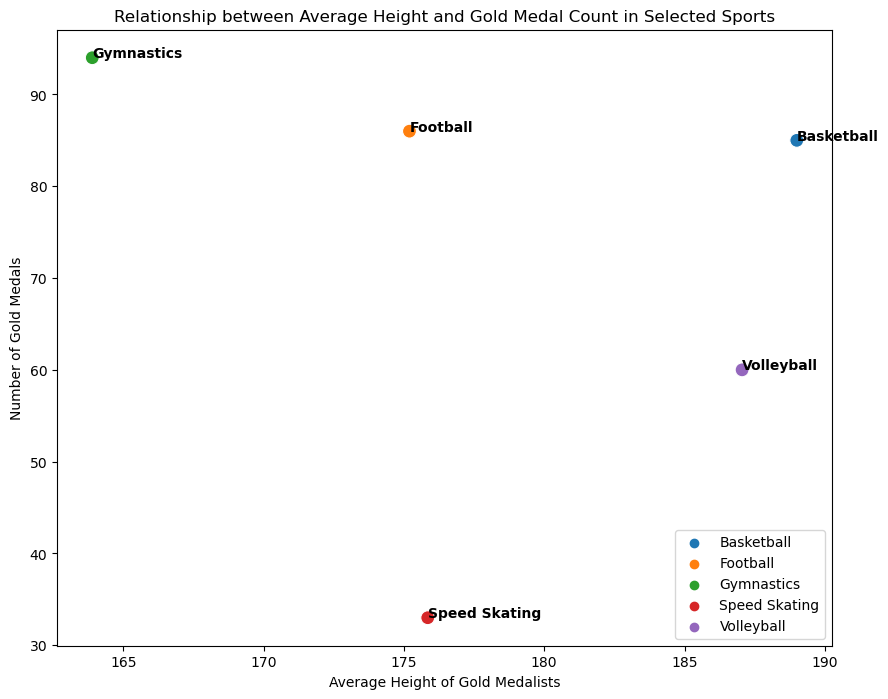

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Height', y='Gold Medal Count', data=merged_data, hue='Sport', s=100)

for i in range(merged_data.shape[0]):
    plt.text(merged_data['Height'][i], merged_data['Gold Medal Count'][i], merged_data['Sport'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.xlabel('Average Height of Gold Medalists')
plt.ylabel('Number of Gold Medals')
plt.title('Relationship between Average Height and Gold Medal Count in Selected Sports')
plt.legend(loc='lower right')
plt.show()